In [2]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.utils import shuffle

In [4]:
column_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv('iris.csv', names = column_names)
label_encoder = preprocessing.LabelEncoder()
dataset['class'] = label_encoder.fit_transform(dataset['class'])
dataset = shuffle(dataset)

dataset.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
91,6.1,3.0,4.6,1.4,1
101,5.8,2.7,5.1,1.9,2
142,5.8,2.7,5.1,1.9,2
89,5.5,2.5,4.0,1.3,1
120,6.9,3.2,5.7,2.3,2
62,6.0,2.2,4.0,1.0,1
42,4.4,3.2,1.3,0.2,0
123,6.3,2.7,4.9,1.8,2
36,5.5,3.5,1.3,0.2,0
109,7.2,3.6,6.1,2.5,2


In [5]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width       class
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


In [6]:
print(dataset.groupby('class').size())

class
0    50
1    50
2    50
dtype: int64


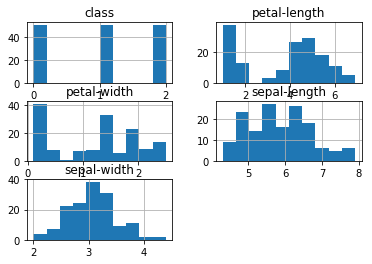

In [7]:
dataset.hist()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


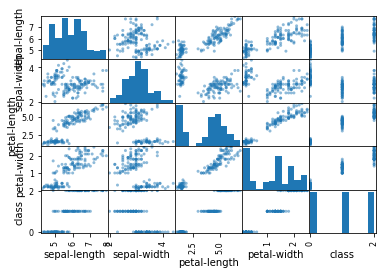

In [8]:
scatter_matrix(dataset)
plt.show()

In [9]:
X = dataset.values[:, 0:4]
Y = dataset['class'].as_matrix()

In [10]:
train_size = 100
X_train = X[:train_size]
Y_train = Y[:train_size]
print(X_train.shape)
print(Y_train.shape)
X_test = X[train_size:]
Y_test = Y[train_size:]
print(X_test.shape)
print(Y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [11]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name, accuracy_score(predictions, Y_test))

LR 0.98
LDA 0.98
KNN 1.0
CART 0.96
NB 0.96
SVM 1.0
